In [6]:
# Diego Benavides
# Mar 28 2022
#HW10

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Problem 2:

. Let’s practice some debugging. Go to this link:
https://colab.research.google.com/drive/1lGjSv4inSuYzoo9lewXvy0KH7XLvris5?usp=sh
aring and copy the code you see in your hw10 juputer notebook. The code has bugs!
Use what we learned in class to debug it, check that the data are OK and plot them out.
Write comments in the notebook about all the bugs you identify and how you fixed them.
If at the end there are bugs you cannot fix, write a comment about what you tried and
how it didn’t work.

In [9]:
print('Problem 2:\n')


my_data = np.array( ( [12, 34, -3, 27, 28, -17 ], 
                    [ 6, 52, 37, -22, -67, 12 ], 
                    [29, -124, 8, -45, -44, 50 ], 
                    [ 3, 18, -69, 32, 48, 284 ] ) )

my_control_data = np.array( ( [12, 442, -12, 22, 21, 17 ], 
                    [ 0, -32, 32, -22, -61, -2 ], 
                    [22, -14, 8, 35, -41, 45 ], 
                    [ 33, 21, -62, 132, 47, 34 ] ) )


# making sure the shapes are the same:

print(np.shape(my_data))
print(np.shape(my_control_data))

Problem 2:

(4, 6)
(4, 6)


In [10]:
print('Problem 2:\n')


# The data should be consistent with each other. Check that values of a given measurement 
# (a given i,j combination) are within fifteen percent (relatively) of each other. These are good data!
# If they are within 25% they may be noisy measurements. 
# If they flip sign they are useless data. 
# Make a mask data_control that contains info about the quality of the data: 
# 1: good, 2: within 15%-25%, 3: 25%+, 4: bad data (>0 in one measurement, <0 in the other)


#make mask data control array equal to 3:

#changing the my_data here to my_control_data
#Adding parenthesis in order to make sure the elements of the array are zeroed out before getting turned to three.

data_control = (0. * my_control_data) + 3


#loop over arrays and check values:

#there are 4 rows and 6 columns, so I swiched the range of the for loops.

for l1 in range( 4):
    for l2 in range( 6 ):
        
      #calculate the relative error
    
    # i and j should be l1 and l2
        rel_dif = ((my_data[ l1, l2 ] - my_control_data[ l1, l2 ])/ my_control_data[ l1, l2 ])
        
      #check it in comparison to the known limits and flag the mask accordingly
    
    #good data ,1, should be be under 0.15, within .15 and .25 its 2 , above and below zero is bad data 4. 
    
    #Here I changed all of the 'and's into '&' symbols
    
    #turned the less than or equal to to a less than.
        if (rel_dif < 0.15):
            data_control[ l1, l2] = 1
            
        # turned both boolean statements to less than or equal to and greater than or equal to.
        elif (rel_dif >= 0.15) & (rel_dif <= 0.25 ):
            data_control[ l1 , l2 ] = 2
            
        #Here I am putting the elif statement in one line because I found the indentation weird.
        
        elif ((my_data[ l1, l2 ] > 0) & (my_control_data[ l1, l2 ] < 0) ) or ((my_data[ l1, l2 ] < 0) & (my_control_data[ l1, l2 ] < 0)):
            data_control[ l1, l2 ] = 4 
        
        
print(data_control)

Problem 2:

[[1. 1. 1. 2. 3. 1.]
 [3. 1. 2. 1. 1. 1.]
 [3. 4. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 3.]]


<ipython-input-10-85e10fea73f5>:30: RuntimeWarning: divide by zero encountered in long_scalars
  rel_dif = ((my_data[ l1, l2 ] - my_control_data[ l1, l2 ])/ my_control_data[ l1, l2 ])


Problem 2:



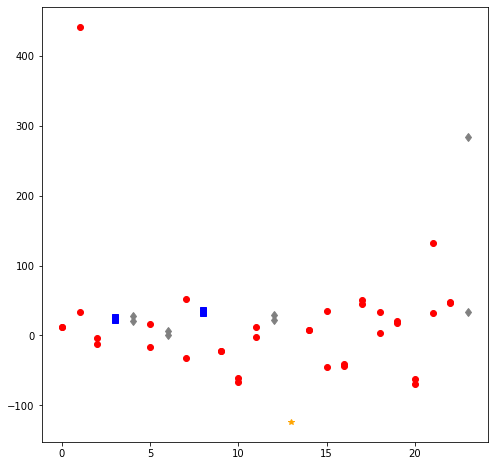

In [11]:
print('Problem 2:\n')

#visualize your results:
#plot the datasets using a different color for the different flags: 1= red, 2 = blue, 3 = gray, 4 = orange
# also use different symbols: 1 = circles, 2 = squares, 3 = diamonds, 4 = stars

#get edges of plot:
min_xy = np.min( [np.min( my_data ), np.min( my_control_data ) ] )
max_xy = np.max( [np.max( my_data ), np.max( my_control_data ) ] )

#set up the plot
plt.figure( figsize= (8,8) )

plt.plot( np.arange( 24 ), np.linspace( min_xy, max_xy, num = 24  )  , linestyle = 'none')

n=0

#plot all i,j combinations:
for i in range( 4 ):
    for j in range( 6 ):
        
        if data_control[ i, j ] == 1:
            plt.plot( n, my_data[ i,j ], color = 'red', marker = 'o' )
            plt.plot( n, my_control_data[ i,j ], color = 'red', marker = 'o' )
            
        # made the boolean statement proper with ==2 instead of =2:
        if data_control[ i, j ] == 2:
            plt.plot( n, my_data[ i,j ], color = 'blue', marker = 's' )
            plt.plot( n, my_control_data[ i,j ], color = 'blue', marker = 's' )
            
        if data_control[ i, j ] == 3:
            plt.plot( n, my_data[ i,j ], color = 'gray', marker = 'd' )
            plt.plot( n, my_control_data[ i,j ], color = 'gray', marker = 'd' )
            
        if data_control[ i, j ] == 4:
            plt.plot( n, my_data[ i,j ], color = 'orange', marker = '*' )
            plt.plot( n, my_control_data[ i,j ] )
            
        #fixed the indentation of the n=n+1 
        n+=1

    

Problem 3:

We want to build an electric circuit with N resistors. What will the
properties of our circuit be if we connect them in series or in parallel? Make a function
my_circuit that takes as input 1) a string with information on whether your circuit is in
series or parallel configuration, 2) the number of resistors, 3) a numpy array with their
individual resistances and 4) the voltage (V) or amperage ( I ) of the circuit (depending
on if it is parallel or series). The function should return information about the total
resistance of the system and the total voltage (for series circuit) or amperage (for a
parallel circuit). Remember that for a series circuit the total resistance is Rtot = Σi ( Ri )
and for a parallel circuit 1/Rtot = Σi (1/Ri ). For a circuit in series I = const; and in parallel
V= const. Also, from Ohm's law: R = V/ I .
Call your function for a series circuit with 3 resistors with resistances of 5.0, 2.0
and 7.0 Ω and a current I = 10 A; and a parallel circuit with 3 resistors with resistances
of 12.0, 5.0 and 20.0 Ω and a voltage of 15V.

In [25]:
print('Problem 3:\n')


def my_circuit( parallel_or_series , num_of_resistors , r_array , V_or_I):
    """This function takes in a string that will state whether the circuit's resistors are in 
    parallel or series, the number of resistors, a numpy array of the values of the resistors, and the 
    voltage or current depending on the circuit.The function returns the total resistance and the total voltage for a series
    circuit and amperage for a parallel circuit.
    INPUT: parallel or series as a string, number of resistors, array of values of resistors, voltage or amperage.
    OUTPUT: Total resistance and voltage or amperage."""
    
    import numpy as np
    
    if ( parallel_or_series == 'parallel' ):
        
        R_total = 1/(np.sum(1/r_array))
        
        I = V_or_I/R_total
        
        return f'The total Resistance of the PARALLEL circuit is {R_total} \u03A9. The total Amperage is {I} A.'
        
    elif ( parallel_or_series == 'series'):
        
        R_total = np.sum(r_array)
        
        V = V_or_I*R_total
        
        return f'The total Resistance of the SERIES circuit is {R_total} \u03A9. The total Voltage is {V} V.'
    
    
print(my_circuit( 'series' , 3 , np.array([ 5 , 2, 7 ]) , 10 ))

print('\n')

print(my_circuit( 'parallel' , 3 , np.array([ 12 , 5 , 20 ]) , 15))
   

Problem 3:

The total Resistance of the SERIES circuit is 14 Ω. The total Voltage is 140 V.


The total Resistance of the PARALLEL circuit is 3.0 Ω. The total Amperage is 5.0 A.


Problem 4:

(15 points + 10 bonus points) In this exercise we will create a small
simulation of our Solar system. Create a dictionary that has as keys the name of all
eight planets of our Solar system and as values their average distance to the Sun in AU
(see also: https://www.jpl.nasa.gov/edu/pdfs/scaless_reference.pdf) .
a) (15 points) Create a function period(a) that calculates the rotational period of
a planet when its average orbital distance a is known. The function should use
Kepler’s 3rd law (see previous homework) and return the orbital period p of the
planet. Call the function for all planets in your dictionary and print their orbital
periods in days.
Assume that all planets orbit in a circular orbit, with a radius equal to their
average orbit at distance a. Use the parametric equations of the circle ( x =
r*cosθ ,	y = r*sinθ ) and calculate the orbits of all 8 planets (i.e., calculate all
combinations of (xi,yi) in the orbit of each planet i). Remember your angle θ
needs to be in radians for Python. Plot the orbits in a box with dimensions (-50,
+50) both in x and y, and add the “Sun” at the center (0,0) of the Solar system.
Your plot should look like this:
Save the plot as a .png using the appropriate command in Python and the
appropriate naming for the image.
b) (Bonus 10 points) Now let’s get our planets moving! Can you create a little
“movie” that plots Mercury, Venus, Earth, Mars and Jupiter orbiting around the
Sun during a Jupiter year? Use a marker point to indicate the location of each
planet at t=0. You can start by assuming that all planets are aligned at y = 0 (see
Fig 1 below). Then try plotting the location of every planet at 30degrees
increments, taking into account their orbital period to show the relative motions of
one planet to the other. E.g, the Earth will do one circle in 1 year, but Jupiter
needs 12 years, so you expect your “Earth” to do more circles before “Jupiter”
completes 1 circle. Save the N necessary plots as .png, where N is the number
of plots you need for “Mars” to complete a full rotation around the “Sun”.

Problem 4a:

The orbital period of Mercury is 88.89754650720121 days.
The orbital period of Venus is 222.9931945149896 days.
The orbital period of Earth is 365.0 days.
The orbital period of Mars is 684.0033777694376 days.
The orbital period of Jupiter is 4328.105913676328 days.
The orbital period of Saturn is 10755.124114179249 days.
The orbital period of Uranus is 30707.517463969627 days.
The orbital period of Neptune is 60155.63684042086 days.


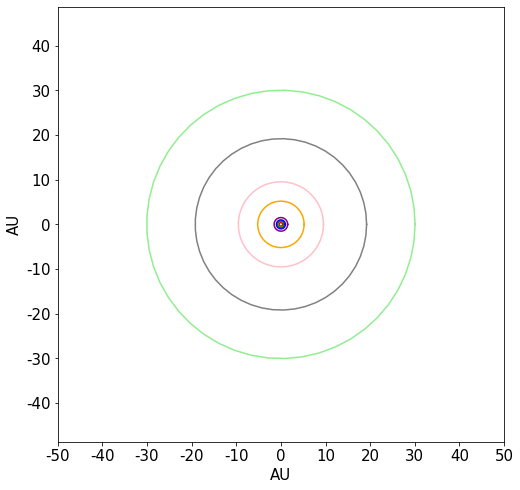

In [12]:
print('Problem 4a:\n')



planetary_distances = { 'Mercury' : 0.39 , 'Venus' : 0.72 , 'Earth' : 1.0 , 'Mars' : 1.52 , 'Jupiter' : 5.2 , 'Saturn' : 9.54 , 'Uranus' : 19.2 , 'Neptune' : 30.06 }

#print(planetary_distances)

def period(a):
    """This function takes in values of a solar system planet's average orbital distance in AU from the sun and returns the
    period of the planets orbit in earth days.
    INPUT: Average orbital distance from sun [AU]
    OUTPUT: Orbital Period [Earth days]
    """
    import numpy as np
    
    #period in years:
    p_y = np.power(a,(3/2))
    
    #years to days:
    
    p_d = p_y * 365
    
    return p_d



#for loop prints out all of the orbital periods for the dictionary:

for k , v in planetary_distances.items():
    print(f"The orbital period of {k} is {period(planetary_distances[k])} days.")
        

#plotting:

theta = np.linspace( 0 , (2*np.pi)) 

xy_0 = np.array([ 0.39 , 0.72 , 1.0 , 1.52 , 5.2 , 9.54 , 19.2 , 30.06 ]) 

x_mercury= xy_0[0] * np.cos(theta)

y_mercury = xy_0[0] * np.sin(theta)


x_venus= xy_0[1] * np.cos(theta)

y_venus = xy_0[1] * np.sin(theta)


x_earth = xy_0[2] * np.cos(theta)

y_earth = xy_0[2] * np.sin(theta)


x_mars= xy_0[3] * np.cos(theta)

y_mars = xy_0[3] * np.sin(theta)


x_jupiter = xy_0[4] * np.cos(theta)
y_jupiter = xy_0[4] * np.sin(theta)


x_saturn = xy_0[5] * np.cos(theta)
y_saturn = xy_0[5] * np.sin(theta)


x_uranus = xy_0[6] * np.cos(theta)
y_uranus = xy_0[6] * np.sin(theta)


x_neptune = xy_0[7] * np.cos(theta)
y_neptune = xy_0[7] * np.sin(theta)




fig, ax = plt.subplots(figsize = (8,8))

plt.axis('equal')

plt.xlim(xmax = 50)
plt.xlim(xmin = -50)

plt.ylim(ymax = 50)
plt.ylim(ymin = -50)

ax.set_xticks(np.arange(-50,51,10))
ax.set_yticks(np.arange(-50,51,10))


plt.xlabel('AU', fontsize = 15)
plt.ylabel('AU', fontsize = 15)

ax.set_xticklabels(np.arange(-50,51,10),fontsize=15)
ax.set_yticklabels(np.arange(-50,51,10),fontsize=15)


plt.plot( x_mercury , y_mercury , linestyle = '-' , color = 'red' )

plt.plot( x_venus , y_venus , linestyle = '-' , color = 'green' )

plt.plot( x_earth , y_earth , linestyle = '-' , color = 'blue' )

plt.plot( x_mars , y_mars , linestyle = '-' , color = 'purple' )

plt.plot( x_jupiter , y_jupiter , linestyle = '-' , color = 'orange' )

plt.plot( x_saturn , y_saturn , linestyle = '-' , color = 'pink' )

plt.plot( x_uranus , y_uranus , linestyle = '-' , color = 'gray' )

plt.plot( x_neptune , y_neptune , linestyle = '-' , color = 'lightgreen' )

plt.show()

#fig.savefig('hw10_diegobenavidesucf_prob4a_screenshot.png',  dpi = 1200 , bbox_inches = 'tight', pad_inches = 0.3 )
